<img src="https://d33wubrfki0l68.cloudfront.net/22691a3c3002324451ed99f4009de8aab761e1b7/d24da/public/images-original/stac-01.png"
     style="margin-right: 10px; width: 50%"/>

# Discover Data via the STAC API

Datasets hosted at EODC are cataloged by making use of the [STAC](https://stacspec.org/en) (SpatioTemporal Asset Catalog) specifications. The catalog service is available as STAC API via [https://stac.eodc.eu/api/v1](https://stac.eodc.eu/api/v1) to enable users to discover and search for datasets filtering by space, time and other attributes. In the following we will demonstrate the use of the STAC API and open-source Python libraries to run search queries against multiple STAC API instances. This notebook is based on the quickstart guide provided by [Planetary Computer](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/) with the objective to showcase the accessibilty of data accross mulitple data providers.

EODC provides a STAC browser deployment via https://services.eodc.eu/browser/ in addition, to allow for the interactive discovery of available data.

## Prerequisites

In this example, we are going to make use of a popular STAC client for Python, the `pystac-client`. The library is already installed in this environment, but can be manually installed anywhere else via `pip install pystac-client`. 
Alternatively, common Python libraries like the `requests` library which support working with HTTP APIs are of course also well suited.

To get started, we need to import the `Client` class to connect to a valid STAC API endpoint, e.g., `https://stac.eodc.eu/api/v1`.

In [29]:
try:
    from pystac_client import Client
except ImportError:
    %pip install pystac-client
    from pystac_client import Client

client = Client.open("https://stac.eodc.eu/api/v1")
client.title

'EODC Data Catalogue'

## CollectionClient

The client can be used to iterate through the Collections available in the EODC Catalog. 

The `get_collections` method fetches the collections from the `/collections` endpoint and returns an iterable. To load a particular collection for further use we call the `get_collection(<collection_id>)` method below.

In [30]:
for collection in client.get_collections():
    print(collection)

<CollectionClient id=SENTINEL2_L2A>
<CollectionClient id=austria-ground-motion>
<CollectionClient id=SENTINEL2_GRI_L1C>
<CollectionClient id=GFM>
<CollectionClient id=s1-alps-wetsnow>
<CollectionClient id=SENTINEL1_HPAR>
<CollectionClient id=DOP_AUT_K_KLAGENFURT>
<CollectionClient id=DOP_AUT_K_OSTTIROL>
<CollectionClient id=DOP_AUT_K_TAMSWEG>
<CollectionClient id=DOP_AUT_K_VILLACH>
<CollectionClient id=DOP_AUT_K_WOLFSBERG>
<CollectionClient id=DOP_AUT_K_ZELL_AM_SEE>
<CollectionClient id=DOP_AUT_K_ZELTWEG>
<CollectionClient id=AUT_DEM>
<CollectionClient id=COP_DEM>
<CollectionClient id=intra-field-crop-growth-potential-2017-2020>
<CollectionClient id=drought-vulnerability-2003-2018>
<CollectionClient id=SENTINEL1_SLC>
<CollectionClient id=SENTINEL1_MPLIA>
<CollectionClient id=SENTINEL1_SIG0_20M>
<CollectionClient id=AI4SAR_SIG0>
<CollectionClient id=SENTINEL1_GRD>
<CollectionClient id=SENTINEL2_L1C>
<CollectionClient id=SENTINEL3_SRAL_L2>
<CollectionClient id=SENTINEL2_MFCOVER>
<Collect

On static as well as dynamic catalogues we cann also make use of the `links` attributes which lets us quickly examinate, for instance, the number of available collections.

In [32]:
child_links = client.get_links('child')
print(f"The EODC Catalog currently features {len(child_links)} collections.")

The EODC Catalog currently features 28 collections.


In [33]:
collection = client.get_collection("SENTINEL2_L2A")
collection

<CollectionClient id=SENTINEL2_L2A>

There are many ways to access the collection metadata programmatically. 

In [34]:
print(f"This collection contains data in the following temporal inteval: {collection.extent.temporal.to_dict()}")

This collection contains data in the following temporal inteval: {'interval': [['2015-07-04T00:00:00Z', None]]}


In [35]:
# To verify this extent, we can calculate the actual limits like this:
collection.update_extent_from_items()
collection.extent.temporal.to_dict()

{'interval': [['2018-03-27T10:00:31.026000Z', '2024-03-20T07:26:21.024000Z']]}

In [36]:
# Check which STAC Extensions are used by the collection
collection.stac_extensions

['https://stac-extensions.github.io/sat/v1.0.0/schema.json',
 'https://stac-extensions.github.io/eo/v1.1.0/schema.json',
 'https://stac-extensions.github.io/projection/v1.1.0/schema.json',
 'https://stac-extensions.github.io/datacube/v2.2.0/schema.json',
 'https://stac-extensions.github.io/timestamps/v1.1.0/schema.json',
 'https://stac-extensions.github.io/alternate-assets/v1.1.0/schema.json',
 'https://stac-extensions.github.io/processing/v1.1.0/schema.json',
 'https://stac-extensions.github.io/raster/v1.1.0/schema.json',
 'https://stac-extensions.github.io/scientific/v1.0.0/schema.json']

## STAC Items

Simlarly to before, we can use the collection client instance to iterate over the items contained in the collection. The server must provide the `/collections/<collection_id>/items` endpoint to support this feature automatically. This can be useful to manually filter items or extract information programmatically. The `get_all_items()` method again returns an iterator.

In [37]:
items = collection.get_all_items()

In [38]:
# Load 10 items with cloud cover less than 10%
items10 = []
for n, item in enumerate(items):
    if len(items10) == 10:
        break
    cloud_cover = item.properties.get("eo:cloud_cover")
    if cloud_cover < 10:
        print(f"Append item {item.id} with {cloud_cover:.2f}% cloud cover")
        items10.append(item)

Append item S2A_T38NKK_20240320T074426_L2A with 1.95% cloud cover
Append item S2A_T37NHD_20240320T074426_L2A with 1.23% cloud cover
Append item S2A_T36KYV_20240320T075218_L2A with 4.95% cloud cover
Append item S2A_T36NXK_20240319T081502_L2A with 0.50% cloud cover
Append item S2A_T36NXH_20240319T081502_L2A with 6.51% cloud cover
Append item S2A_T36NWK_20240319T081502_L2A with 5.34% cloud cover
Append item S2A_T38NLH_20240317T073412_L2A with 0.01% cloud cover
Append item S2A_T38NLG_20240317T073412_L2A with 6.41% cloud cover
Append item S2A_T38NLF_20240317T073412_L2A with 6.92% cloud cover
Append item S2A_T38NKK_20240317T073412_L2A with 0.00% cloud cover


In [39]:
items10[-1]

<Item id=S2A_T38NKK_20240317T073412_L2A>

## Item Search

Data providers that have realized their STAC implementation in terms of a dynamic STAC API offer users the opportunity to search their Catalogs using spatial and temporal constraints. The `pystac_client` enables this search via the class method `search`. This function returns an ItemSearch instance that can further be accessed to retrieve matched items.

Note that many implementations usually support the *core* STAC search endpoint paramters as described in the [STAC API - Item Search](https://github.com/radiantearth/stac-api-spec/tree/master/item-search#query-parameter-table) specification. Those are:
- limit
- bbox
- datetime
- intersects
- ids
- collections


## Search criteria

We can use the STAC API to search for assets meeting some criteria. This might include the date and time the asset covers, is spatial extent, or any other property captured in the STAC item’s metadata. Spatial extent can be defined using a bounding box, with optione *bbox*, or as one can pass a GeoJSON to the *intersects* option of the catalog search method.

In [40]:
from rich.console import Console
console = Console()

time_range = "2024-01-15/2024-02-15"

# GEOJSON can be created on geojson.io
area_of_interest = {
  "coordinates": [
          [
            [
              40.98630444922817,
              -10.46089017153001
            ],
            [
              30.050569679510772,
              -10.46089017153001
            ],
            [
              30.050569679510772,
              -26.97920540744108
            ],
            [
              40.98630444922817,
              -26.97920540744108
            ],
            [
              40.98630444922817,
              -10.46089017153001
            ]
          ]
        ],
        "type": "Polygon"
}

## Search via EODC STAC API

In [41]:
import pystac_client

eodc_catalog = pystac_client.Client.open(
    "https://stac.eodc.eu/api/v1",
)

search = eodc_catalog.search(
    collections=["SENTINEL2_L2A"],
    intersects=area_of_interest,
    datetime=time_range
)
items_eodc = search.item_collection()
console.print(f"On EODC we found {len(items_eodc)} items for the given search query")

On EODC we found 118 items for the given search query

## Search via Plantary Computer STAC API

In [42]:

import planetary_computer

pc_catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
search = pc_catalog.search(
    collections=["sentinel-2-l2a"],
    intersects=area_of_interest,
    datetime=time_range)
items_pc = search.item_collection()
console.print(f"On PC we found {len(items_pc)} items for Sentinel-2 L2")

On PC we found 2568 items for Sentinel-2 L2

Each `pystac.Item <https://pystac.readthedocs.io/en/stable/api/pystac.html#pystac.Item>` in this ItemCollection includes all the metadata for that scene. STAC Items are GeoJSON features, and so can be loaded by libraries like geopandas.

In [43]:
import geopandas

df = geopandas.GeoDataFrame.from_features(items_eodc.to_dict(), crs="epsg:4326")
df

,geometry,created,datetime,platform,grid:code,proj:epsg,providers,s2:tile_id,instruments,view:azimuth,...,s2:cloud_shadow_percentage,s2:nodata_pixel_percentage,s2:unclassified_percentage,s2:dark_features_percentage,s2:not_vegetated_percentage,s2:degraded_msi_data_percentage,s2:high_proba_clouds_percentage,s2:reflectance_conversion_factor,s2:medium_proba_clouds_percentage,s2:saturated_defective_pixel_percentage
0,"POLYGON ((32.77529 -16.28018, 32.06370 -16.278...",2024-03-12T14:36:06.888647Z,2024-02-05T07:51:21.024000Z,sentinel-2a,MGRS-36KVG,32736,[{'url': 'https://earth.esa.int/web/guest/home...,S2A_OPER_MSI_L2A_TL_2APS_20240205T114450_A0450...,[msi],286.261906,...,7.536254,41.646791,0.188103,0.016210,7.373476,0.0303,5.029669,1.030181,6.231292,0.0
1,"POLYGON ((32.57040 -17.18333, 32.05928 -17.182...",2024-03-12T14:35:34.636660Z,2024-02-05T07:51:21.024000Z,sentinel-2a,MGRS-36KVF,32736,[{'url': 'https://earth.esa.int/web/guest/home...,S2A_OPER_MSI_L2A_TL_2APS_20240205T114450_A0450...,[msi],285.552004,...,13.595557,61.326271,0.916431,0.006717,5.778849,0.0248,24.857603,1.030181,19.343075,0.0
2,"POLYGON ((32.36439 -18.08690, 32.05458 -18.086...",2024-03-12T14:35:02.978266Z,2024-02-05T07:51:21.024000Z,sentinel-2a,MGRS-36KVE,32736,[{'url': 'https://earth.esa.int/web/guest/home...,S2A_OPER_MSI_L2A_TL_2APS_20240205T114450_A0450...,[msi],290.170829,...,15.770450,80.860507,0.255969,0.015931,6.619993,0.1130,18.461959,1.030181,13.207205,0.0
3,"POLYGON ((32.15886 -18.99034, 32.04959 -18.990...",2024-03-12T14:34:30.376107Z,2024-02-05T07:51:21.024000Z,sentinel-2a,MGRS-36KVD,32736,[{'url': 'https://earth.esa.int/web/guest/home...,S2A_OPER_MSI_L2A_TL_2APS_20240205T114450_A0450...,[msi],291.052923,...,0.251157,97.420049,0.122428,0.011574,25.669754,0.0001,0.029835,1.030181,0.160365,0.0
4,"POLYGON ((31.12842 -16.27256, 31.11868 -17.264...",2024-03-12T14:35:57.136437Z,2024-02-05T07:51:21.024000Z,sentinel-2a,MGRS-36KUG,32736,[{'url': 'https://earth.esa.int/web/guest/home...,S2A_OPER_MSI_L2A_TL_2APS_20240205T114450_A0450...,[msi],243.996999,...,11.649205,0.000000,0.301844,0.014486,6.179767,0.0143,15.545389,1.030181,14.064389,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,"POLYGON ((30.15088 -18.97059, 30.13350 -19.961...",2024-03-13T07:38:00.677444Z,2024-01-16T07:52:41.024000Z,sentinel-2a,MGRS-36KTD,32736,[{'url': 'https://earth.esa.int/web/guest/home...,S2A_OPER_MSI_L2A_TL_2APS_20240116T112652_A0447...,[msi],185.712992,...,11.665303,0.000000,1.252408,0.005717,10.211433,0.1363,32.789230,1.033942,15.525228,0.0
114,"POLYGON ((29.83382 -18.06772, 29.85024 -19.058...",2024-03-13T07:37:50.527164Z,2024-01-16T07:52:41.024000Z,sentinel-2a,MGRS-35KRV,32735,[{'url': 'https://earth.esa.int/web/guest/home...,S2A_OPER_MSI_L2A_TL_2APS_20240116T112652_A0447...,[msi],101.072766,...,4.729208,0.000000,2.349176,0.000936,4.520616,0.2951,56.080228,1.033942,17.201094,0.0
115,"POLYGON ((29.84874 -18.97060, 29.86612 -19.961...",2024-03-13T07:37:38.982289Z,2024-01-16T07:52:41.024000Z,sentinel-2a,MGRS-35KRU,32735,[{'url': 'https://earth.esa.int/web/guest/home...,S2A_OPER_MSI_L2A_TL_2APS_20240116T112652_A0447...,[msi],133.708579,...,8.668843,0.000000,1.529995,0.001732,7.683438,0.1178,40.001929,1.033942,15.289558,0.0
116,"POLYGON ((29.81532 -16.86125, 29.82109 -17.253...",2024-03-13T07:37:29.360786Z,2024-01-16T07:52:41.024000Z,sentinel-2a,MGRS-35KRB,32735,[{'url': 'https://earth.esa.int/web/guest/home...,S2A_OPER_MSI_L2A_TL_2APS_20240116T112652_A0447...,[msi],101.082281,...,0.786741,4.511733,0.011445,0.000003,0.009458,8.0410,28.316534,1.033942,70.377237,0.0


In [44]:
df = geopandas.GeoDataFrame.from_features(items_pc.to_dict(), crs="epsg:4326")
df

,geometry,datetime,platform,proj:epsg,instruments,s2:mgrs_tile,constellation,s2:granule_id,eo:cloud_cover,s2:datatake_id,...,s2:cloud_shadow_percentage,s2:nodata_pixel_percentage,s2:unclassified_percentage,s2:dark_features_percentage,s2:not_vegetated_percentage,s2:degraded_msi_data_percentage,s2:high_proba_clouds_percentage,s2:reflectance_conversion_factor,s2:medium_proba_clouds_percentage,s2:saturated_defective_pixel_percentage
0,"POLYGON ((34.17876 -9.94850, 34.15922 -10.0373...",2024-02-15T07:50:21.024000Z,Sentinel-2A,32736,[msi],36LXP,Sentinel 2,S2A_OPER_MSI_L2A_TL_MSFT_20240215T125159_A0451...,99.955118,GS2A_20240215T075021_045177_N05.10,...,0.031595,84.615755,0.000000,0.000000,0.003515,0.0019,63.223636,1.026913,30.832082,0.0
1,"POLYGON ((33.97761 -10.85383, 33.96197 -10.927...",2024-02-15T07:50:21.024000Z,Sentinel-2A,32736,[msi],36LXN,Sentinel 2,S2A_OPER_MSI_L2A_TL_MSFT_20240215T124722_A0451...,99.955571,GS2A_20240215T075021_045177_N05.10,...,0.029121,99.111325,0.000000,0.000000,0.015307,0.0323,62.031078,1.026913,37.852067,0.0
2,"POLYGON ((34.00399 -10.73157, 33.99370 -10.778...",2024-02-15T07:50:21.024000Z,Sentinel-2A,32736,[msi],36LWP,Sentinel 2,S2A_OPER_MSI_L2A_TL_MSFT_20240215T125158_A0451...,97.524667,GS2A_20240215T075021_045177_N05.10,...,2.321779,0.491641,0.030311,0.000000,0.002254,0.0328,87.734538,1.026913,8.422638,0.0
3,"POLYGON ((33.97760 -10.85389, 33.96197 -10.927...",2024-02-15T07:50:21.024000Z,Sentinel-2A,32736,[msi],36LWN,Sentinel 2,S2A_OPER_MSI_L2A_TL_MSFT_20240215T130504_A0451...,96.603358,GS2A_20240215T075021_045177_N05.10,...,3.105658,13.738447,0.087325,0.000000,0.038782,0.0252,87.005788,1.026913,8.608841,0.0
4,"POLYGON ((33.77714 -11.75813, 33.76399 -11.818...",2024-02-15T07:50:21.024000Z,Sentinel-2A,32736,[msi],36LWM,Sentinel 2,S2A_OPER_MSI_L2A_TL_MSFT_20240215T130609_A0451...,97.257429,GS2A_20240215T075021_045177_N05.10,...,2.636303,33.863655,0.012090,0.000512,0.008538,0.0680,76.262146,1.026913,15.878278,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,"POLYGON ((32.99980 -25.31619, 34.09063 -25.312...",2024-01-15T07:31:49.024000Z,Sentinel-2B,32736,[msi],36JWS,Sentinel 2,S2B_OPER_MSI_L2A_TL_MSFT_20240115T114235_A0358...,0.387630,GS2B_20240115T073149_035825_N05.10,...,0.219014,0.000003,0.011413,0.000876,0.223928,0.0214,0.102163,1.034026,0.285467,0.0
2564,"POLYGON ((32.99980 -26.21939, 34.09892 -26.215...",2024-01-15T07:31:49.024000Z,Sentinel-2B,32736,[msi],36JWR,Sentinel 2,S2B_OPER_MSI_L2A_TL_MSFT_20240115T114223_A0358...,4.804812,GS2B_20240115T073149_035825_N05.10,...,0.000000,0.000017,0.000000,0.000000,0.000000,0.0188,2.393679,1.034026,2.216861,0.0
2565,"POLYGON ((32.65726 -25.40368, 32.66320 -25.381...",2024-01-15T07:31:49.024000Z,Sentinel-2B,32736,[msi],36JVT,Sentinel 2,S2B_OPER_MSI_L2A_TL_MSFT_20240115T113919_A0358...,5.576178,GS2B_20240115T073149_035825_N05.10,...,4.190132,72.134912,2.128113,0.352834,8.093941,0.0000,1.833265,1.034026,3.742711,0.0
2566,"POLYGON ((32.41368 -26.30551, 32.42434 -26.266...",2024-01-15T07:31:49.024000Z,Sentinel-2B,32736,[msi],36JVS,Sentinel 2,S2B_OPER_MSI_L2A_TL_MSFT_20240115T114041_A0358...,0.258706,GS2B_20240115T073149_035825_N05.10,...,0.052001,50.188732,1.154520,0.178010,7.163046,0.0000,0.080782,1.034026,0.177924,0.0


At EODC we only host Sentinel-2 L2A for selected regions, while PC provides access to a global archive. For instance, the example above defines the bounding box for Mozambique, this covers parts of neighbouring countries as well which are not part of EODC's AOIs.

Now we can select the item with the least (min) cloud cover. Data providers exposing STAC can make use of a number of [STAC extensions](https://stac-extensions.github.io/). Some collections implement the so-called **eo extension**, which can be used to sort items by cloudiness.

In [45]:
selected_item = min(items_eodc, key=lambda item: item.properties["eo:cloud_cover"])
console.print(selected_item)

<Item id=S2A_T36KVD_20240205T081140_L2A>

Each STAC item has one or more Assets, which include links to actual files.

In [46]:
import rich.table

table = rich.table.Table(title="Assets in STAC Item")
table.add_column("Asset Key", style="cyan", no_wrap=True)
table.add_column("Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

console.print(table)

                  Assets in STAC Item                   
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key          ┃ Description                     ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ aot                │ Aerosol optical thickness (AOT) │
│ nir                │ NIR 1 - 10m                     │
│ red                │ Red - 10m                       │
│ scl                │ Scene classification map (SCL)  │
│ wvp                │ Water Vapour (WVP)              │
│ blue               │ Blue - 10m                      │
│ green              │ Green - 10m                     │
│ nir08              │ NIR 2 - 20m                     │
│ nir09              │ NIR 3 - 60m                     │
│ swir16             │ SWIR 1.6μm - 20m                │
│ swir22             │ SWIR 2.2μm - 20m                │
│ visual             │ True color image                │
│ aot_10m            │ Aerosol optical thickness (AOT) │
│ aot_60m            │ Aerosol optical thickness (AOT) │
│ coastal            │ Coastal - 60m                   │
│ preview            │                                 │
│ red_20m            │ Red - 20m                       │
│ red_60m            │ Red - 60m                       │
│ scl_60m            │ Scene classification map (SCL)  │
│ wvp_10m            │ Water Vapour (WVP)              │
│ wvp_60m            │ Water Vapour (WVP)              │
│ blue_20m           │ Blue - 20m                      │
│ blue_60m           │ Blue - 60m                      │
│ rededge1           │ Red Edge 1 - 20m                │
│ rededge2           │ Red Edge 2 - 20m                │
│ rededge3           │ Red Edge 3 - 20m                │
│ safe-zip           │ ZIP Archive                     │
│ green_20m          │ Green - 20m                     │
│ green_60m          │ Green - 60m                     │
│ nir08_60m          │ NIR 2 - 60m                     │
│ swir16_60m         │ SWIR 1.6μm - 60m                │
│ swir22_60m         │ SWIR 2.2μm - 60m                │
│ visual_20m         │ True color image                │
│ visual_60m         │ True color image                │
│ coastal_20m        │ Coastal - 20m                   │
│ rededge1_60m       │ Red Edge 1 - 60m                │
│ rededge2_60m       │ Red Edge 2 - 60m                │
│ rededge3_60m       │ Red Edge 3 - 60m                │
│ safe_manifest      │                                 │
│ granule_metadata   │                                 │
│ inspire_metadata   │                                 │
│ product_metadata   │                                 │
│ datastrip_metadata │                                 │
└────────────────────┴─────────────────────────────────┘

In [47]:
console.print(selected_item.assets["coastal"].to_dict())

{
    'href': 'https://data.eodc.eu/collections/SENTINEL2_L2A/items/S2A_T36KVD_20240205T081140_L2A/coastal',
    'type': 'image/jp2',
    'title': 'Coastal - 60m',
    'gsd': 60,
    'eo:bands': [
        {'name': 'B01', 'common_name': 'coastal', 'center_wavelength': 0.443, 'full_width_half_max': 0.027}
    ],
    'alternate': {
        'local': {
            'href': 
'/eodc/products/copernicus.eu/s2a_prd_msil2a/2024/02/05/S2A_MSIL2A_20240205T075121_N0510_R135_T36KVD_20240205T11445
0.zip',
            'archive:href': 
'S2A_MSIL2A_20240205T075121_N0510_R135_T36KVD_20240205T114450.SAFE/GRANULE/L2A_T36KVD_A045034_20240205T081140/IMG_D
ATA/R60m/T36KVD_20240205T075121_B01_60m.jp2',
            'archive:type': 'image/jp2',
            'archive:format': 'application/zip'
        }
    },
    'proj:bbox': [399960.0, 7790200.0, 509760.0, 7900000.0],
    'proj:shape': [1830, 1830],
    'raster:bands': [
        {'scale': 0.0001, 'nodata': 0, 'offset': -0.1, 'data_type': 'uint16', 'spatial_resolution': 60}
    ],
    'proj:transform': [60.0, 0.0, 399960.0, 0.0, -60.0, 7900000.0],
    'roles': ['data', 'reflectance']
}

In [48]:
from IPython.display import Image

selected_item = min(items_pc, key=lambda item: item.properties["eo:cloud_cover"])
console.print(selected_item)

Image(url=selected_item.assets["rendered_preview"].href, width=500)

<Item id=S2A_MSIL2A_20240208T080101_R035_T35KRA_20240208T124256>

In [49]:
selected_item.assets["B02"].href[:250]

'https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/35/K/RA/2024/02/08/S2A_MSIL2A_20240208T080101_N0510_R035_T35KRA_20240208T124256.SAFE/GRANULE/L2A_T35KRA_A045077_20240208T082119/IMG_DATA/R10m/T35KRA_20240208T080101_B02_10m.tif?st=2024-04-11T1'

In [50]:
import requests

requests.head(selected_item.assets["B02"].href).status_code

200

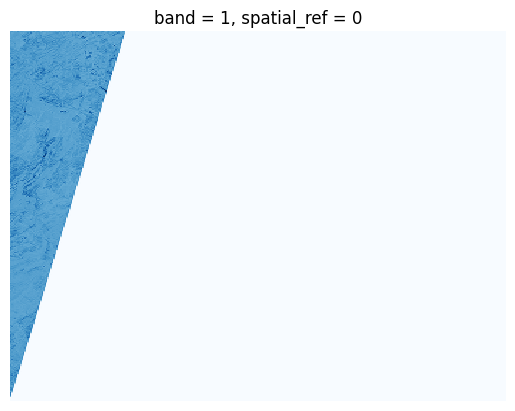

In [51]:
import rioxarray

ds = rioxarray.open_rasterio(
    selected_item.assets["B02"].href, overview_level=4
).squeeze()
img = ds.plot(cmap="Blues", add_colorbar=False)
img.axes.set_axis_off();

## Searching additional properties provided by STAC

We can search for all Sentinel-1 GRD scenes over a given area and temporal extent observed in descending orbits.

In [52]:
search = eodc_catalog.search(
    collections=["SENTINEL1_GRD"],
    intersects=area_of_interest,
    datetime="2024-01-01/2024-02-01",
    query={"sat:orbit_state": {"eq": "descending"}},
)
items_s1_desc = search.item_collection()
df_s1 = geopandas.GeoDataFrame.from_features(items_s1_desc.to_dict(), crs="epsg:4326")
df_s1

,geometry,datetime,platform,s1:shape,proj:bbox,proj:epsg,providers,published,deprecated,proj:shape,...,s1:product_identifier,s1:product_timeliness,s1:processing_datetime,sar:resolution_azimuth,sar:pixel_spacing_range,sar:observation_direction,sar:pixel_spacing_azimuth,sar:looks_equivalent_number,s1:instrument_configuration_ID,sat:platform_international_designator
0,"POLYGON ((-179.30844 -19.01004, 178.37137 -18....",2024-02-01T17:33:09.140577Z,sentinel-1a,"[25196, 11685]","[-179.308441, -19.01004, 178.638702, -17.427599]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2024-02-18T15:49:58Z,False,"[25196, 11685]",...,S1A_IW_GRDH_1SDV_20240201T173300_20240201T1733...,Fast-24h,2024-02-01T19:43:49.000000Z,22,10,right,10,4.4,7,2014-016A
1,"POLYGON ((-179.05374 -17.96630, 178.63873 -17....",2024-02-01T17:32:45.975543Z,sentinel-1a,"[25196, 19547]","[-179.053741, -17.966305, 179.077072, -15.687831]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2024-02-18T15:49:42Z,False,"[25196, 19547]",...,S1A_IW_GRDH_1SDV_20240201T173231_20240201T1733...,Fast-24h,2024-02-01T19:46:46.000000Z,22,10,right,10,4.4,7,2014-016A
2,"POLYGON ((29.68630 -14.08966, 27.37279 -13.556...",2024-01-31T03:40:33.918694Z,sentinel-1a,"[25705, 22883]","[27.372789, -14.089662, 30.156445, -11.511931]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2024-02-18T10:19:38Z,False,"[25705, 22883]",...,S1A_IW_GRDH_1SDV_20240131T034016_20240131T0340...,Fast-24h,2024-01-31T06:14:46.000000Z,22,10,right,10,4.4,7,2014-016A
3,"POLYGON ((30.15647 -12.03735, 27.86179 -11.512...",2024-01-31T03:40:04.411532Z,sentinel-1a,"[25681, 16818]","[27.861794, -12.037354, 30.495512, -10.008661]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2024-02-18T10:19:02Z,False,"[25681, 16818]",...,S1A_IW_GRDH_1SDV_20240131T033951_20240131T0340...,Fast-24h,2024-01-31T06:13:51.000000Z,22,10,right,10,4.4,7,2014-016A
4,"POLYGON ((30.49553 -10.52801, 28.21223 -10.008...",2024-01-31T03:39:39.412088Z,sentinel-1a,"[25670, 16818]","[28.212233, -10.528013, 30.831066, -8.504535]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2024-02-18T10:18:36Z,False,"[25670, 16818]",...,S1A_IW_GRDH_1SDV_20240131T033926_20240131T0339...,Fast-24h,2024-01-31T06:13:45.000000Z,22,10,right,10,4.4,7,2014-016A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,"POLYGON ((36.18543 -12.50905, 33.87078 -11.978...",2024-01-04T03:15:30.165449Z,sentinel-1a,"[25865, 19564]","[33.870781, -12.509053, 36.582542, -10.233454]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2024-02-13T10:47:57Z,False,"[25865, 19564]",...,S1A_IW_GRDH_1SDV_20240104T031515_20240104T0315...,Fast-24h,2024-01-04T05:46:49.000000Z,22,10,right,10,4.4,7,2014-016A
97,"POLYGON ((31.19011 -16.36998, 28.87715 -15.832...",2024-01-02T03:33:03.306971Z,sentinel-1a,"[25451, 16898]","[28.877155, -16.36998, 31.539423, -14.325405]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2024-02-09T00:33:55Z,False,"[25451, 16898]",...,S1A_IW_GRDH_1SDV_20240102T033250_20240102T0333...,Fast-24h,2024-01-02T07:48:00.000000Z,22,10,right,10,4.4,7,2014-016A
98,"POLYGON ((31.53944 -14.85659, 29.24175 -14.325...",2024-01-02T03:32:38.266732Z,sentinel-1a,"[25451, 16844]","[29.241751, -14.856589, 31.891714, -12.824115]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2024-02-09T00:33:03Z,False,"[25451, 16844]",...,S1A_IW_GRDH_1SDV_20240102T033225_20240102T0332...,Fast-24h,2024-01-02T07:48:12.000000Z,22,10,right,10,4.4,7,2014-016A
99,"POLYGON ((31.89174 -13.34943, 29.60950 -12.824...",2024-01-02T03:32:13.266568Z,sentinel-1a,"[25426, 16844]","[29.609505, -13.349435, 32.228687, -11.320103]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2024-02-09T00:32:09Z,False,"[25426, 16844]",...,S1A_IW_GRDH_1SDV_20240102T033200_20240102T0332...,Fast-24h,2024-01-02T07:47:59.000000Z,22,10,right,10,4.4,7,2014-016A


## Analysing STAC Metadata

STAC items are proper GeoJSON Features, and so can be treated as a kind of data on their own.

Found 2568 Sentinel-2 tiles.

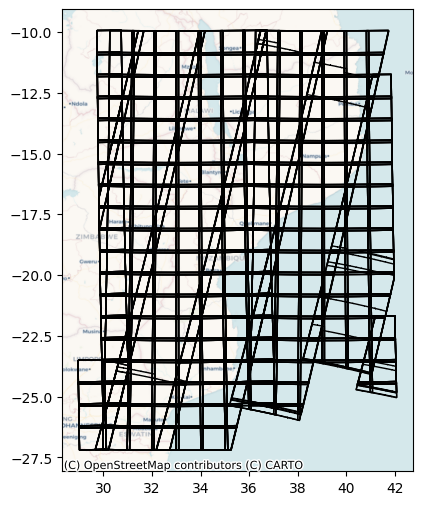

In [53]:
import contextily

search = pc_catalog.search(
    collections=["sentinel-2-l2a"],
    intersects=area_of_interest,
    datetime=time_range,
)
items = search.item_collection()

rich.print(f"Found {len(items)} Sentinel-2 tiles.")

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
ax = df[["geometry", "datetime", "s2:mgrs_tile", "eo:cloud_cover"]].plot(
    facecolor="none", figsize=(12, 6)
)
contextily.add_basemap(ax, crs=df.crs.to_string(), source=contextily.providers.CartoDB.Voyager)

We can also compute the cloud coverage of Sentinel-2 over a region over time.

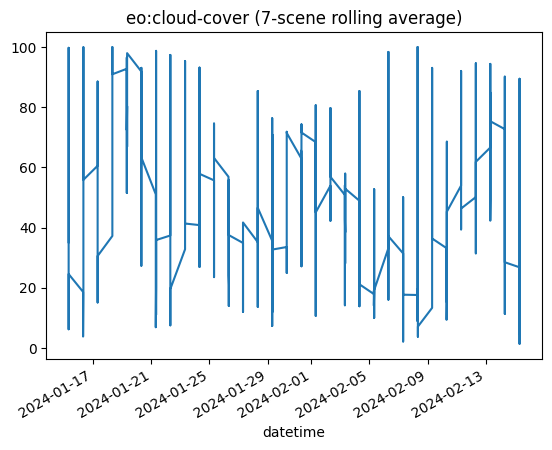

In [54]:
import pandas as pd

search = pc_catalog.search(
    collections=["sentinel-2-l2a"],
    intersects=area_of_interest,
    datetime=time_range,
)
items = search.item_collection()
df = geopandas.GeoDataFrame.from_features(items.to_dict())
df["datetime"] = pd.to_datetime(df["datetime"])

ts = df.set_index("datetime").sort_index()["eo:cloud_cover"].rolling(7).mean()
ts.plot(title="eo:cloud-cover (7-scene rolling average)");

## Explore STAC Catalogs and Collections

Our catalog is a STAC Catalog that we can crawl or search. The Catalog contains STAC Collections for each dataset we have indexed (which is not the yet the entirety of data hosted by the Planetary Computer).

Collections have information about the STAC Items they contain. For instance, here we look at the Bands available for Landsat 8 Collection 2 Level 2 data:

In [55]:
import pandas as pd

sentinel2_l1c = eodc_catalog.get_collection("SENTINEL2_L1C")

pd.DataFrame(sentinel2_l1c.summaries.get_list("eo:bands"))

,name,common_name,description,center_wavelength,full_width_half_max
0,B01,coastal,Band 1 - Coastal aerosol,0.4430,0.027
1,B02,blue,Band 2 - Blue,0.4900,0.098
2,B03,green,Band 3 - Green,0.5600,0.045
3,B04,red,Band 4 - Red,0.6650,0.038
4,B05,rededge,Band 5 - Vegetation red edge 1,0.7040,0.019
5,B06,rededge,Band 6 - Vegetation red edge 2,0.7400,0.018
6,B07,rededge,Band 7 - Vegetation red edge 3,0.7830,0.028
7,B08,nir,Band 8 - NIR,0.8420,0.145
8,B8A,rededge,Band 8A - Vegetation red edge 4,0.8650,0.033
9,B09,NaN,Band 9 - Water vapor,0.9450,0.026


We can see what Assets are available on our item with:

In [56]:
pd.DataFrame.from_dict(sentinel2_l1c.extra_fields["item_assets"], orient="index")

,roles,title,alternate,media_type,description
B01,[data],Band 1 - Coastal aerosol - 60m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B02,[data],Band 2 - Blue - 10m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B03,[data],Band 3 - Green - 10m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B04,[data],Band 4 - Red - 10m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B05,[data],Band 5 - Vegetation red edge 1 - 20m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B06,[data],Band 6 - Vegetation red edge 2 - 20m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B07,[data],Band 7 - Vegetation red edge 3 - 20m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B08,[data],Band 8 - NIR - 10m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B09,[data],Band 9 - Water vapor - 60m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B10,[data],Band 10 - SWIR - Cirrus - 60m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
